In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#LOAD DATASET
column_names = [
    'Status_of_existing_checking_account',
    'Duration_in_month',
    'Credit_history',
    'Purpose',
    'Credit_amount',
    'Savings_account_bonds',
    'Present_employment_since',
    'Installment_rate_in_percentage_of_disposable_income',
    'Personal_status_and_sex',
    'Other_debtors_guarantors',
    'Present_residence_since',
    'Property',
    'Age_in_years',
    'Other_installment_plans',
    'Housing',
    'Number_of_existing_credits_at_this_bank',
    'Job',
    'Number_of_people_being_liable_to_provide_maintenance_for',
    'Telephone',
    'foreign_worker',
    'Credit_Risk'  # 1 = Good, 2 = Bad
]

In [ ]:
df = pd.read_csv('/content/german.data', sep=' ', header=None, names=column_names)

In [ ]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
#TARGET VARIABLE ENCODING
df['Credit_Risk'] = df['Credit_Risk'].map({1: 1, 2: 0})

In [ ]:
categorical_cols = [
    'Status_of_existing_checking_account',
    'Credit_history',
    'Purpose',
    'Savings_account_bonds',
    'Present_employment_since',
    'Personal_status_and_sex',
    'Other_debtors_guarantors',
    'Property',
    'Other_installment_plans',
    'Housing',
    'Job',
    'Telephone',
    'foreign_worker'

]
numerical_cols = [
    'Duration_in_month',
    'Credit_amount',
    'Installment_rate_in_percentage_of_disposable_income',
    'Present_residence_since',
    'Age_in_years',
    'Number_of_existing_credits_at_this_bank',
    'Number_of_people_being_liable_to_provide_maintenance_for'
]

In [ ]:
#Handling Categorical Variables with One-Hot Encoding and Scaling Numerical Features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
X = df.drop('Credit_Risk', axis=1)
y = df['Credit_Risk']

In [ ]:
X_processed = preprocessor.fit_transform(X)

In [ ]:
#SPLITTING THE DATA
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
# prompt: perform grid search hyperparameter parameter tuning on random forest

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", accuracy)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.7725
Test Accuracy with Best Parameters: 0.77


In [ ]:
#Making Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
#Evaluating the Model
print("\nModel Performance:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy Score: 0.76
AUC Score: 0.7880952380952381

Confusion Matrix:
[[ 26  34]
 [ 14 126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52        60
           1       0.79      0.90      0.84       140

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.76      0.74       200



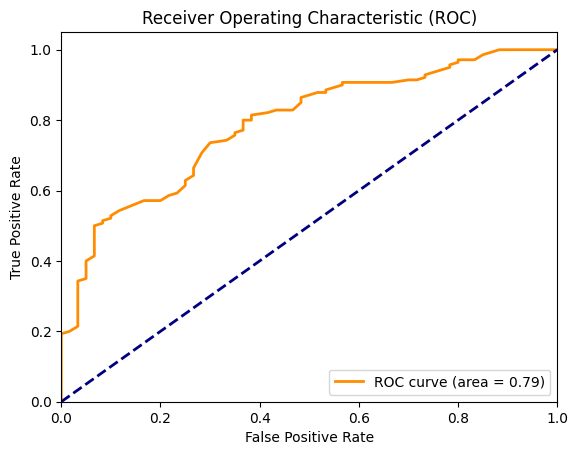

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


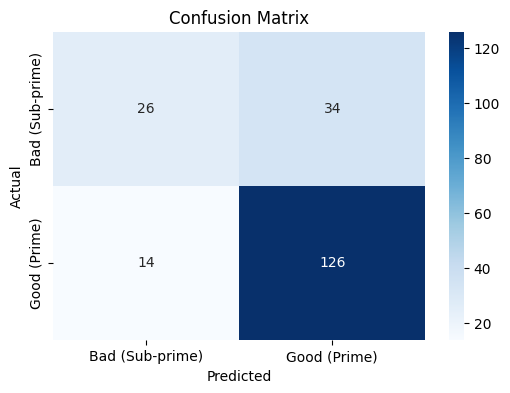

In [ ]:
#Plot Confusion Matrix

plt.figure(figsize=(6,4))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',

            xticklabels=['Bad (Sub-prime)', 'Good (Prime)'],

            yticklabels=['Bad (Sub-prime)', 'Good (Prime)'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.title('Confusion Matrix')

plt.show()

In [ ]:
#Feature Importance

# Get feature names after One-Hot Encoding
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

feature_names = numerical_cols + list(ohe_features)

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

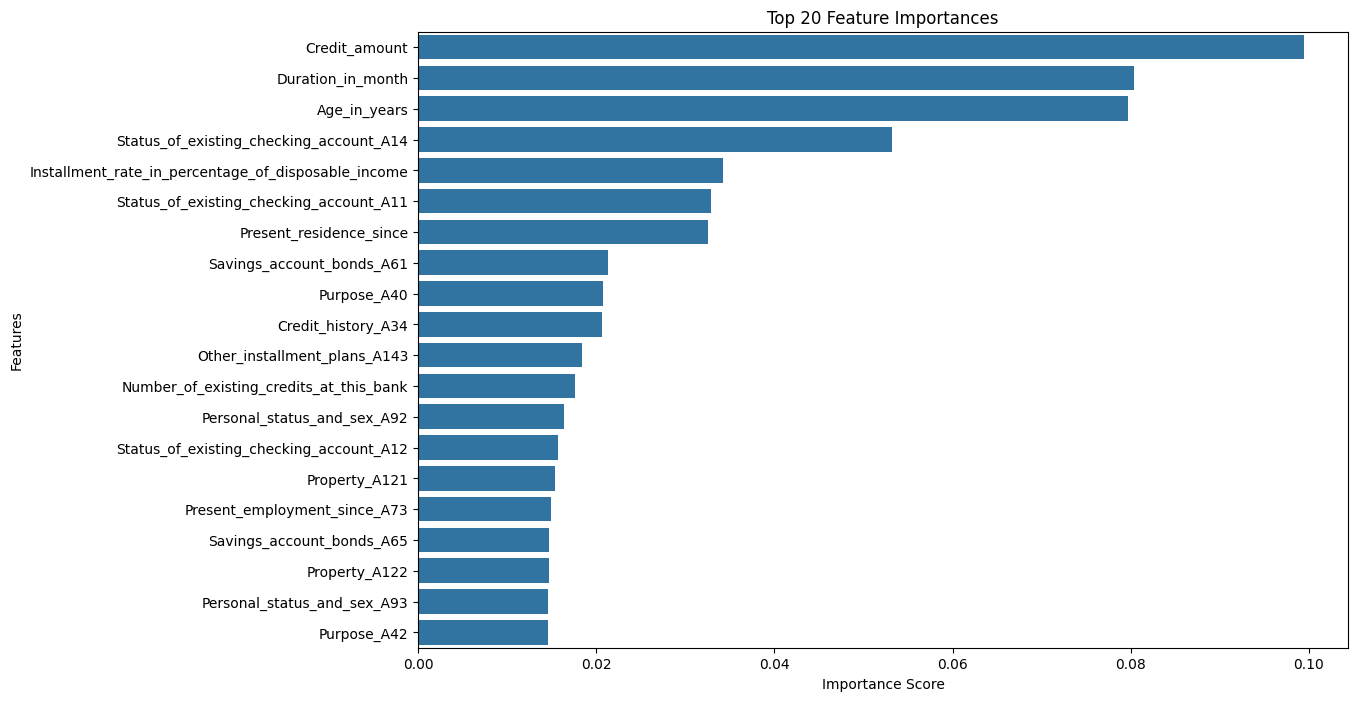

In [ ]:
#Plot Feature Importances

plt.figure(figsize=(12, 8))

sns.barplot(x=importances[indices][:20], y=np.array(feature_names)[indices][:20])

plt.title('Top 20 Feature Importances')

plt.xlabel('Importance Score')

plt.ylabel('Features')

plt.show()

In [ ]:
# Predict for a New Customer

# Example new customer data & Ensure the order of features matches the original dataset
new_customer = {

    'Status_of_existing_checking_account': 'A11',

    'Duration_in_month': 12,

    'Credit_history': 'A34',

    'Purpose': 'A40',

    'Credit_amount': 5000,

    'Savings_account_bonds': 'A61',

    'Present_employment_since': 'A75',

    'Installment_rate_in_percentage_of_disposable_income': 4,

    'Personal_status_and_sex': 'A93',

    'Other_debtors_guarantors': 'A101',

    'Present_residence_since': 4,

    'Property': 'A121',

    'Age_in_years': 35,

    'Other_installment_plans': 'A141',

    'Housing': 'A151',

    'Number_of_existing_credits_at_this_bank': 2,

    'Job': 'A173',

    'Number_of_people_being_liable_to_provide_maintenance_for': 1,

    'Telephone': 'A192',

    'foreign_worker': 'A201'

}
# Convert to DataFrame

new_customer_df = pd.DataFrame([new_customer])
# Preprocess the new customer data

new_customer_processed = preprocessor.transform(new_customer_df)
# Make prediction
new_prediction = rf_model.predict(new_customer_processed)

new_prediction_proba = rf_model.predict_proba(new_customer_processed)[:, 1]
# Output the prediction

if new_prediction[0] == 1:

    print("\nThe new customer is classified as PRIME (Good Credit Risk).")

else:

    print("\nThe new customer is classified as SUB-PRIME (Bad Credit Risk).")

print(f"Probability of being PRIME: {new_prediction_proba[0]:.2f}")


The new customer is classified as SUB-PRIME (Bad Credit Risk).
Probability of being PRIME: 0.34
